In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split  # for splitting dataset
from imblearn.over_sampling import SMOTE  # for oversampling
from imblearn.under_sampling import NearMiss # for undersampling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import NearMiss
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from sklearn.metrics import confusion_matrix
warnings.simplefilter(action = 'ignore')

In [ ]:
data = upd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv.zip')
data_orginal = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv.zip')

In [ ]:
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
print('\n=== First 5 rows of data ===')
display(data.head())


=== First 5 rows of data ===


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
print('\n=== Dataset Info ===')
display(data.info())
print('Findings: Need to switch to Int type ')


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 n

None

Findings: Need to switch to Int type 


In [ ]:
print('\n=== Check Missing Values ===')
display(data.isnull().sum())
print('Findings: No Missing Value ')


=== Check Missing Values ===


,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


Findings: No Missing Value 


In [ ]:
print('\n=== Basic Staistic Describe ===')
display(data.describe())
print('Findings: Inbalance Target Variable')


=== Basic Staistic Describe ===


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Findings: Inbalance Target Variable


In [ ]:
print('\n=== Duplicated Values ===')
display(data.duplicated().sum())


=== Duplicated Values ===


23899

**Pre-Processing**

**Transform data type to integer**

In [ ]:
for col in data.columns:
    data[col] = data[col].astype(int)

print('\n=== Checking Data Type ===')
display(data.info())
display(data.head())


=== Checking Data Type ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHl

None

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


**Checking Unique value**

In [ ]:
print('\n=== Unique Value Overview ===')
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

display(pd.DataFrame(unique_values, index=['Unique Value Count']).transpose())

print('\n=== Unique Value Detailed Overview ===')
for column in data.columns:
    print(f'\n{column}:')
    print(f'Unique Values:{sorted(data[column].unique())}')


=== Unique Value Overview ===


,Unique Value Count
Diabetes_012,3
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2



=== Unique Value Detailed Overview ===

Diabetes_012:
Unique Values:[0, 1, 2]

HighBP:
Unique Values:[0, 1]

HighChol:
Unique Values:[0, 1]

CholCheck:
Unique Values:[0, 1]

BMI:
Unique Values:[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 95, 96, 98]

Smoker:
Unique Values:[0, 1]

Stroke:
Unique Values:[0, 1]

HeartDiseaseorAttack:
Unique Values:[0, 1]

PhysActivity:
Unique Values:[0, 1]

Fruits:
Unique Values:[0, 1]

Veggies:
Unique Values:[0, 1]

HvyAlcoholConsump:
Unique Values:[0, 1]

AnyHealthcare:
Unique Values:[0, 1]

NoDocbcCost:
Unique Values:[0, 1]

GenHlth:
Unique Values:[1, 2, 3, 4, 5]

MentHlth:
Unique Values:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,

**Check Outlier**

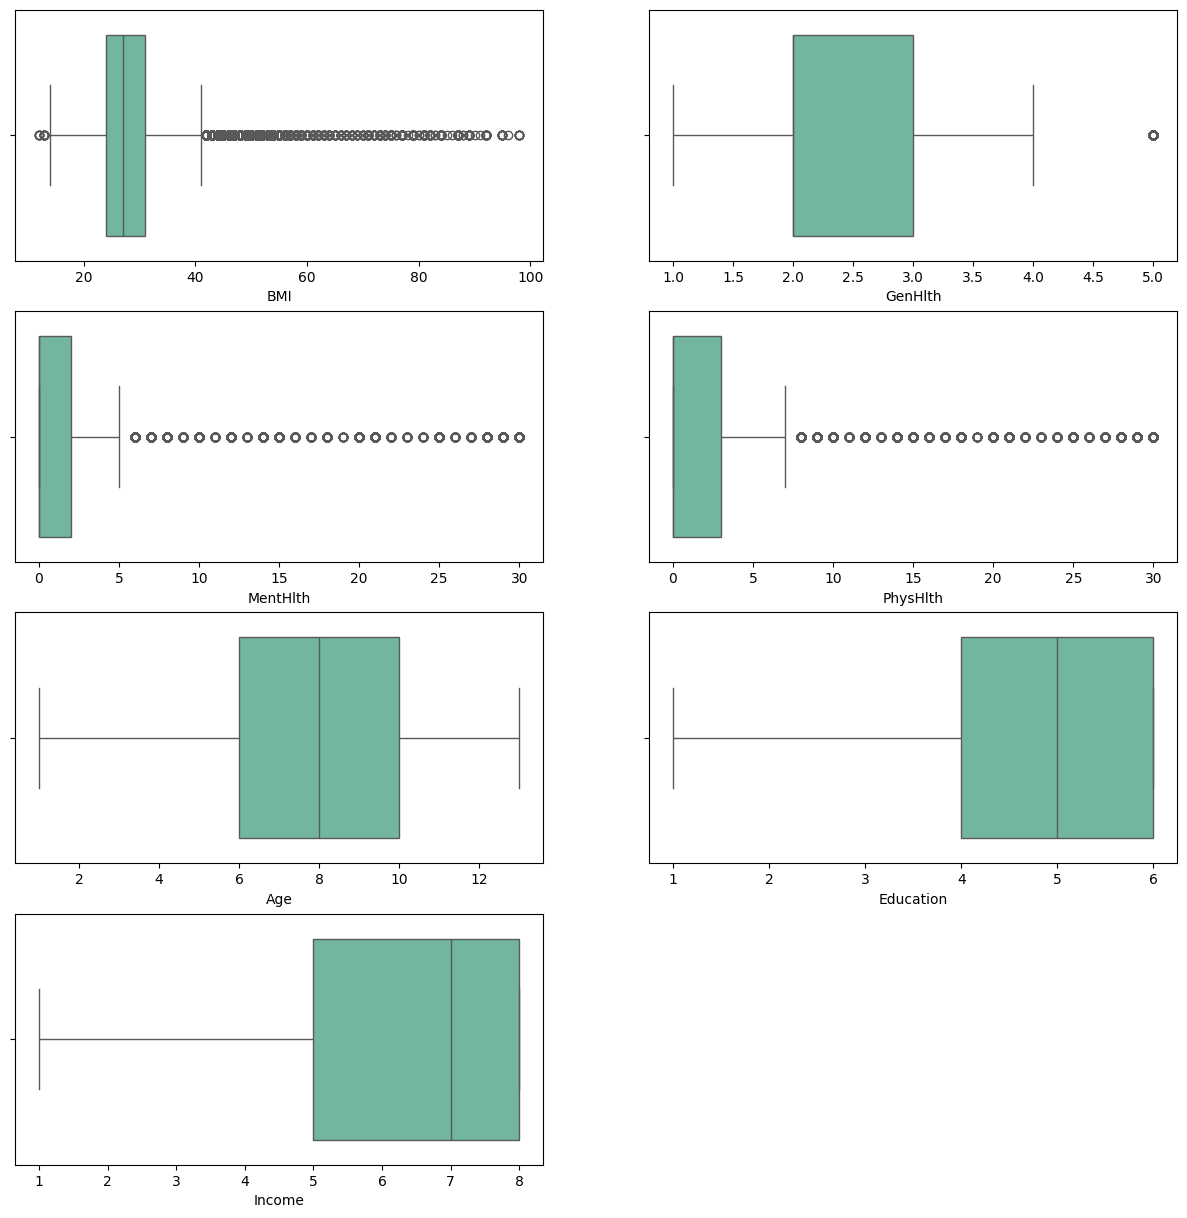

In [ ]:
plt.figure(figsize = (15,15))
for i, col in enumerate (['BMI', 'GenHlth', 'MentHlth','PhysHlth','Age', 'Education','Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data, palette = 'Set2')
plt.show()

**Check Duplicated Data and Drop**

In [ ]:
data.duplicated().sum()

23899

In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(229781, 22)

**Better EDA Code**

In [ ]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
# Better show categorical variables
data2 = data.copy()

In [ ]:
# That help us to show the relation between features clearly
#### Age
age_maping = {
    1: '18 to 24',
    2: '25 to 29',
    3: '30 to 34',
    4: '35 to 39',
    5: '40 to 44',
    5: '45 to 49',
    6: '50 to 54',
    7: '55 to 59',
    8: '60 to 64',
    9: '65 to 69',
    10: '70 to 74',
    11: '75 to 79',
    12: '80 or Older'
}
data2['Age'] = data2['Age'].replace(age_maping)

In [ ]:
education_maping={
    1: 'Never Attended School',
    2: 'Elementary',
    3: 'Junior High School',
    4: 'Senior High School',
    5: 'Undergraduate Degree',
    6: 'Magister'
}
data2['Education']=data2['Education'].replace(education_maping)

In [ ]:
income_maping = {
    1: 'Less Than $10,000 ',
    2: 'Less Than $10,000 ',
    3: 'Less Than $10,000 ',
    4: 'Less Than $10,000 ',
    5: 'Less Than $35,000 ',
    6: 'Less Than $35,000 ',
    7: 'Less Than $35,000 ',
    8: '$75,000 or More '
}
data2['Income']=data2['Income'].replace(income_maping)

In [ ]:
data2.Diabetes_012[data2['Diabetes_012']==0]='No Diabetes'
data2.Diabetes_012[data2['Diabetes_012']==1]='Diabetes'

data2.HighBP[data2['HighBP']==0]='No High'
data2.HighBP[data2['HighBP']==1]='High BP'

data2.HighChol[data2['HighChol']==0]='No High Cholesterol'
data2.HighChol[data2['HighChol']==1]=' High Cholesterol'

data2.CholCheck[data2['CholCheck']==0]='No Chol Check in 5 Years'
data2.CholCheck[data2['CholCheck']==1]='Chol Check in 5 Years'

data2.Smoker[data2['Smoker']==0]='No'
data2.Smoker[data2['Smoker']==1]='Yes'

data2.Stroke[data2['Stroke']==0]='No'
data2.Stroke[data2['Stroke']==1]='Yes'

data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack']==0]='No'
data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack']==1]='Yes'

In [ ]:
data2.PhysActivity[data2['PhysActivity']==0]='No'
data2.PhysActivity[data2['PhysActivity']==1]='Yes'

data2.Fruits[data2['Fruits']==0]='No'
data2.Fruits[data2['Fruits']==1]='Yes'

data2.Veggies[data2['Veggies']==0]='No'
data2.Veggies[data2['Veggies']==1]='Yes'

data2.MentHlth[data2['MentHlth']==0]='No'
data2.MentHlth[data2['MentHlth']==1]='Yes'

data2.PhysHlth[data2['PhysHlth']==0]='No'
data2.PhysHlth[data2['PhysHlth']==1]='Yes'

data2.DiffWalk[data2['DiffWalk']==0]='No'
data2.DiffWalk[data2['DiffWalk']==1]='Yes'

data2.Sex[data2['Sex']==0]='Female'
data2.Sex[data2['Sex']==1]='Male'

data2.AnyHealthcare[data2['AnyHealthcare']==0]='No'
data2.AnyHealthcare[data2['AnyHealthcare']==1]='Yes'

data2.NoDocbcCost[data2['NoDocbcCost']==0]='No'
data2.NoDocbcCost[data2['NoDocbcCost']==1]='Yes'


In [ ]:
data2.head(20)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No Diabetes,High BP,High Cholesterol,Chol Check in 5 Years,40,Yes,No,No,No,No,...,Yes,No,5,18,15,Yes,Female,65 to 69,Senior High School,"Less Than $10,000"
1,No Diabetes,No High,No High Cholesterol,No Chol Check in 5 Years,25,Yes,No,No,Yes,No,...,No,Yes,3,No,No,No,Female,55 to 59,Magister,"Less Than $10,000"
2,No Diabetes,High BP,High Cholesterol,Chol Check in 5 Years,28,No,No,No,No,Yes,...,Yes,Yes,5,30,30,Yes,Female,65 to 69,Senior High School,"$75,000 or More"
3,No Diabetes,High BP,No High Cholesterol,Chol Check in 5 Years,27,No,No,No,Yes,Yes,...,Yes,No,2,No,No,No,Female,75 to 79,Junior High School,"Less Than $35,000"
4,No Diabetes,High BP,High Cholesterol,Chol Check in 5 Years,24,No,No,No,Yes,Yes,...,Yes,No,2,3,No,No,Female,75 to 79,Undergraduate Degree,"Less Than $10,000"
5,No Diabetes,High BP,High Cholesterol,Chol Check in 5 Years,25,Yes,No,No,Yes,Yes,...,Yes,No,2,No,2,No,Male,70 to 74,Magister,"$75,000 or More"
6,No Diabetes,High BP,No High Cholesterol,Chol Check in 5 Years,30,Yes,No,No,No,No,...,Yes,No,3,No,14,No,Female,65 to 69,Magister,"Less Than $35,000"
7,No Diabetes,High BP,High Cholesterol,Chol Check in 5 Years,25,Yes,No,No,Yes,No,...,Yes,No,3,No,No,Yes,Female,75 to 79,Senior High School,"Less Than $10,000"
8,2,High BP,High Cholesterol,Chol Check in 5 Years,30,Yes,No,Yes,No,Yes,...,Yes,No,5,30,30,Yes,Female,65 to 69,Undergraduate Degree,"Less Than $10,000"
9,No Diabetes,No High,No High Cholesterol,Chol Check in 5 Years,24,No,No,No,No,No,...,Yes,No,2,No,No,No,Male,60 to 64,Senior High School,"Less Than $10,000"


**EDA**

**Correlation Heatmap**

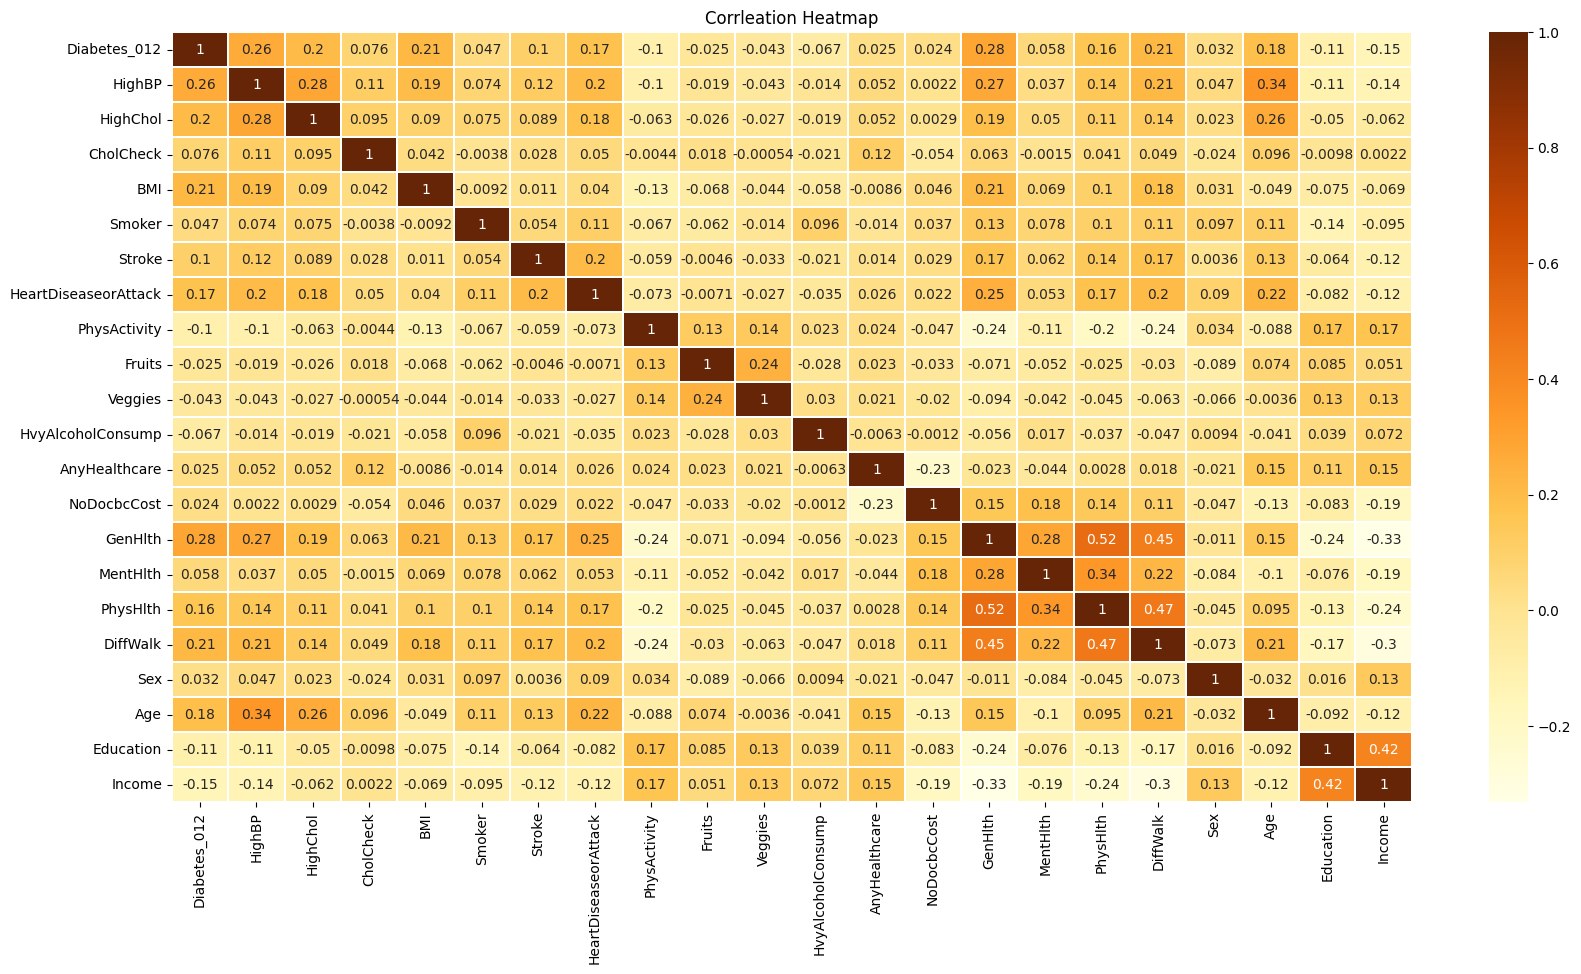

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), annot = True, cmap = 'YlOrBr', linewidths = 0.3)
plt.title('Corrleation Heatmap')
plt.show()

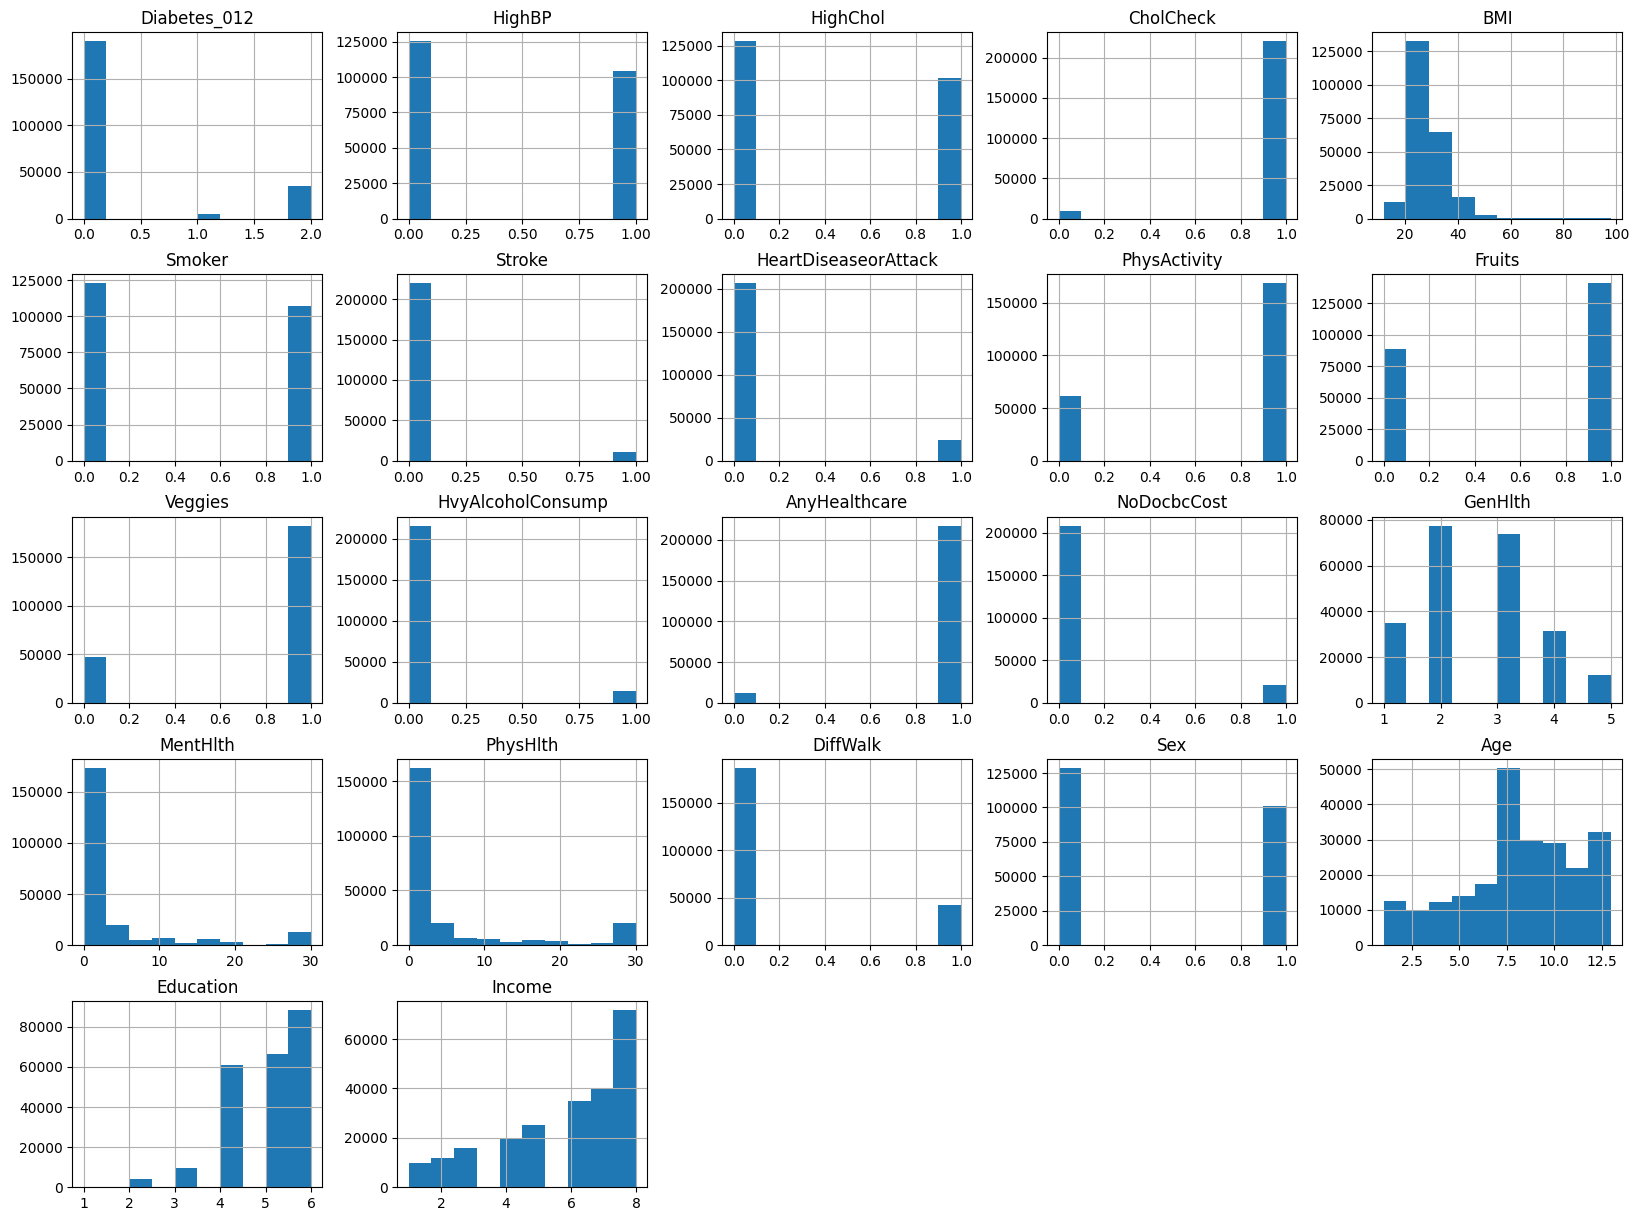

In [ ]:
data.hist(figsize = (20,15));

<Axes: xlabel='Diabetes_012', ylabel='count'>

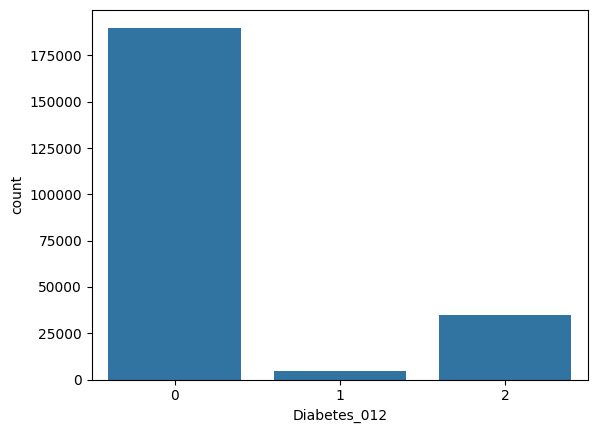

In [ ]:
sns.countplot(x = 'Diabetes_012', data = data)

**VIF Test**

In [ ]:
def calc_VIF(x):
    vif=pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i)for i in range(x.shape[1])]
    retrun(vif)

X=add_constant(data)
ds = pd.Series([variance_inflation_factor(X.values,i)
              for i in range(X.shape[1])],
               index = X.columns)
print(ds)

const                   109.547733
Diabetes_012              1.196142
HighBP                    1.315868
HighChol                  1.167606
CholCheck                 1.036087
BMI                       1.143747
Smoker                    1.076218
Stroke                    1.077925
HeartDiseaseorAttack      1.170203
PhysActivity              1.130800
Fruits                    1.098139
Veggies                   1.098315
HvyAlcoholConsump         1.027818
AnyHealthcare             1.110036
NoDocbcCost               1.135822
GenHlth                   1.742978
MentHlth                  1.221952
PhysHlth                  1.594631
DiffWalk                  1.514183
Sex                       1.076794
Age                       1.359986
Education                 1.272637
Income                    1.432763
dtype: float64


In [ ]:
data.shape

(229781, 22)

**ANOVA Feature Select**

In [ ]:
X = data_orginal.iloc[:,1:]
Y = data_orginal.iloc[:,0]

In [ ]:
fs = SelectKBest(score_func = f_classif, k =10)
X_selected = fs.fit_transform(X,Y)
print(X_selected.shape)

pd.DataFrame(X_selected).head(3)

(253680, 10)


,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,40.0,0.0,5.0,15.0,1.0,9.0,4.0,3.0
1,0.0,0.0,25.0,0.0,3.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,28.0,0.0,5.0,30.0,1.0,9.0,4.0,8.0


**Best Feature**

In [ ]:
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores], axis=1)
f_Scores.columns = ['Feature','Score']

# Sort values from highest to lowest
f_Scores_sorted = f_Scores.sort_values(by='Score', ascending=False)
display(f_Scores_sorted)

print(f_Scores_sorted.nlargest(16,'Score'))

,Feature,Score
15,PhysHlth,141598.783225
14,MentHlth,24607.463010
3,BMI,19775.252090
0,HighBP,10731.721009
16,DiffWalk,10627.556856
13,GenHlth,10595.234173
18,Age,10225.159975
6,HeartDiseaseorAttack,7468.339377
1,HighChol,6483.776499
20,Income,5380.434934


                 Feature          Score
15              PhysHlth  141598.783225
14              MentHlth   24607.463010
3                    BMI   19775.252090
0                 HighBP   10731.721009
16              DiffWalk   10627.556856
13               GenHlth   10595.234173
18                   Age   10225.159975
6   HeartDiseaseorAttack    7468.339377
1               HighChol    6483.776499
20                Income    5380.434934
5                 Stroke    2798.417025
7           PhysActivity     922.529401
19             Education     849.169260
10     HvyAlcoholConsump     802.538572
4                 Smoker     562.684715
12           NoDocbcCost     362.740875


from matplotlib import pyplot as plt
f_Scores_sorted['Score'].plot(kind='hist', bins=20, title='Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
f_Scores_sorted['Score'].plot(kind='line', figsize=(8, 4), title='Score')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
columns =["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare"]
data.drop(columns, axis = 1, inplace = True)

**Data Splitting**

In [ ]:
X = data.drop('Diabetes_012', axis = 1)
y = data['Diabetes_012']

In [ ]:
X_train, X_test,Y_train, y_test = train_test_split(
X,y, test_size = 0.2, random_state = 42)

**Dealing with Imbalance**

**SMOTE**

In [ ]:
data['Diabetes_012'].value_counts()


smote = SMOTE(random_state = 42)
X_train_smote,Y_train_smote = smote.fit_resample(X_train, Y_train)
print('Training set Distribution after SMOTE')
print(pd.DataFrame(Y_train_smote).value_counts())
print('\nTest set Distribution')
print(pd.DataFrame(y_test).value_counts())

Training set Distribution after SMOTE
Diabetes_012
0               151939
1               151939
2               151939
Name: count, dtype: int64

Test set Distribution
Diabetes_012
0               38116
2                6935
1                 906
Name: count, dtype: int64


**Near Miss**

In [ ]:
nm = NearMiss(version = 1, n_neighbors = 10)
x_sm, y_sm = nm.fit_resample(X,y)

In [ ]:
display(data.shape)
x_sm.shape
# 250k droped to 70k

(229781, 17)

(13887, 16)

In [ ]:
X_train, X_test,Y_train,y_test = train_test_split(x_sm,y_sm, test_size = 0.3, random_state = 42)

**Data Scalling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**Modeling**

**Logistic Regression**

In [ ]:
lg = LogisticRegression(random_state = 42, max_iter = 1500)
lg.fit(X_train,Y_train)

LogisticRegression(max_iter=1500, random_state=42)

In [ ]:
y_pred_lg=lg.predict(X_test)

print('Training set score:{:4f}'.format(lg.score(X_train,Y_train)))
print('test set score {:4f}'.format(lg.score(X_test,y_test)))

Training set score:0.708848
test set score 0.708183


**Logistic Regression MSE and RMSE**

In [ ]:
# MSE and RMSE
mse_lg = mean_squared_error(y_test,y_pred_lg)
print('MSE_lg:'+str(mse_lg))
rmse_lg = math.sqrt(mean_squared_error(y_test,y_pred_lg))
print('RMSE_lg:'+str(rmse_lg))

MSE_lg:0.839692824574034
RMSE_lg:0.9163475457347141


**Logistic Regression Classification Report**

In [ ]:
cm_lg = classification_report(y_test,y_pred_lg)

print('Logistic Regression Model1:')
print(cm_lg)
print('MSE_lg:'+str(mse_lg))
print('RMSE_lg:'+str(rmse_lg))

Logistic Regression Model1:
              precision    recall  f1-score   support

           0       0.64      0.79      0.71      1389
           1       0.93      0.73      0.82      1410
           2       0.61      0.61      0.61      1368

    accuracy                           0.71      4167
   macro avg       0.73      0.71      0.71      4167
weighted avg       0.73      0.71      0.71      4167

MSE_lg:0.839692824574034
RMSE_lg:0.9163475457347141


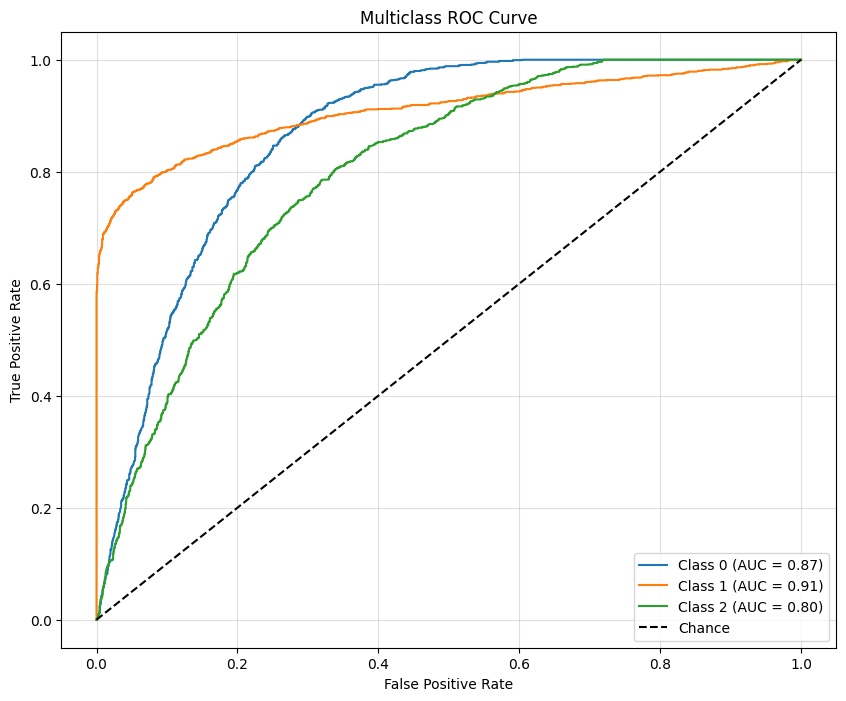

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the target labels
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)

# Predicted probabilities
y_pred_proba = lg.predict_proba(X_test)

# Number of classes
n_classes = y_test_binarized.shape[1]

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {auc:.2f})')

# Plot baseline
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.4)
plt.show()



**Logistic Regression Confusion Matrix**

In [ ]:
pip install mlxtend


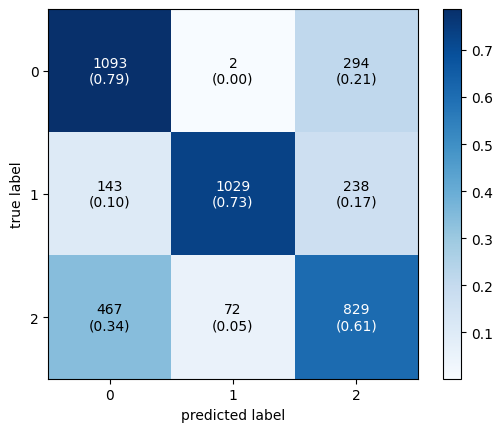

MSE_lg:0.839692824574034
RMSE_lg:0.9163475457347141


In [ ]:
from sklearn.metrics import confusion_matrix, mean_squared_error
from mlxtend.plotting import plot_confusion_matrix

cm_lg = confusion_matrix(y_test,y_pred_lg)
plot_confusion_matrix(conf_mat=cm_lg, show_absolute = True,
                     show_normed = True,
                     colorbar = True)
plt.show()
print('MSE_lg:'+str(mse_lg))
print('RMSE_lg:'+str(rmse_lg))

**Decision Trees**

**Find the optimal depth**

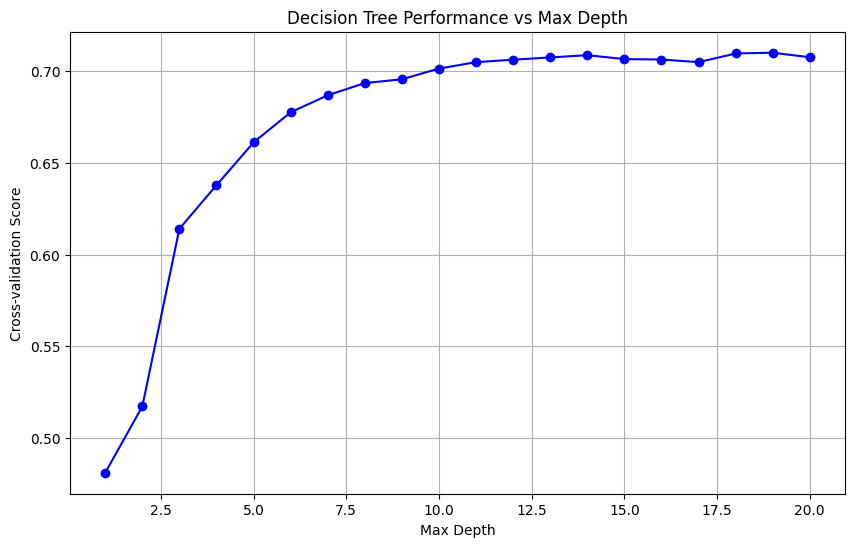

Best depth: 19
Best score: 0.7102


In [ ]:
max_depths = range(1, 21)
scores = []

for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    score = cross_val_score(dt, X_train, Y_train, cv=5).mean()
    scores.append(score)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, scores, 'bo-')
plt.xlabel('Max Depth')
plt.ylabel('Cross-validation Score')
plt.title('Decision Tree Performance vs Max Depth')
plt.grid(True)
plt.show()

# Find best depth
best_depth = max_depths[np.argmax(scores)]
print(f"Best depth: {best_depth}")
print(f"Best score: {max(scores):.4f}")


In [ ]:
dt = DecisionTreeClassifier(max_depth = 14)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=14)

In [ ]:
y_pred_dt = dt.predict(X_test)

**Decision Tree MSE and RMSE**

In [ ]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = math.sqrt(mean_squared_error(y_test,y_pred_dt))
print("MSE_dt:"+str(mse_dt))
print('RMSE_dt:'+str(rmse_dt))

MSE_dt:0.7890568754499641
RMSE_dt:0.8882887342806752


In [ ]:
cm_dt_report = classification_report(y_test,y_pred_dt)
print(cm_dt_report)
print("MSE_dt:"+str(mse_dt))
print('RMSE_dt:'+str(rmse_dt))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73      1389
           1       0.90      0.74      0.81      1410
           2       0.61      0.61      0.61      1368

    accuracy                           0.72      4167
   macro avg       0.73      0.72      0.72      4167
weighted avg       0.73      0.72      0.72      4167

MSE_dt:0.7890568754499641
RMSE_dt:0.8882887342806752


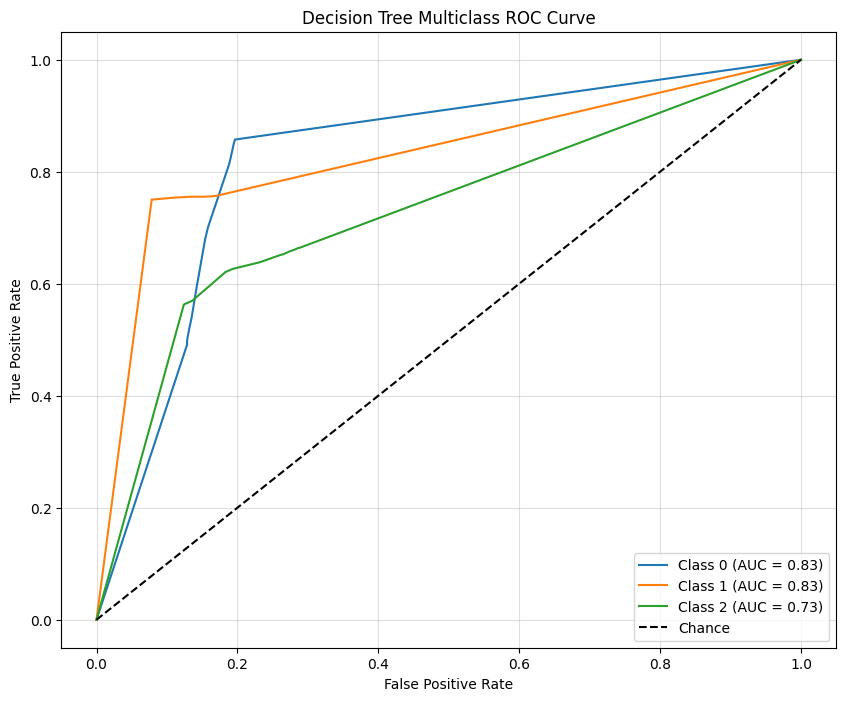

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train)

# Predicted probabilities
y_pred_proba = dt.predict_proba(X_test)

# Binarize the target labels for multiclass ROC
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)

# Number of classes
n_classes = y_test_binarized.shape[1]

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {auc:.2f})')

# Plot baseline
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.title('Decision Tree Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.4)
plt.show()


**Decision Tree Confusion Matrix**

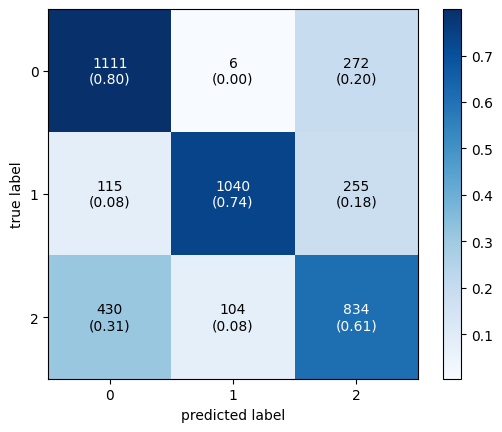

In [ ]:
cm_dt = confusion_matrix(y_test,y_pred_dt)
plot_confusion_matrix(conf_mat = cm_dt, show_absolute = True,
                     show_normed = True,
                     colorbar = True)
plt.show()


**KNN**

**Find the Optimal k-value**

Best parameters: {'n_neighbors': 9}
Best score: 0.6618312757201646


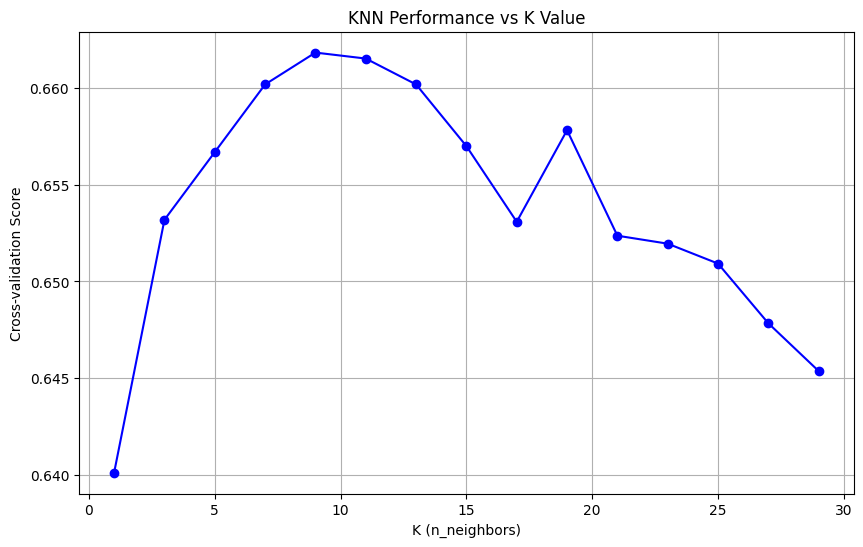

In [ ]:
param_grid = {
    'n_neighbors': range(1, 31, 2)
}

# Create and fit GridSearchCV
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Print results
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Plot scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31, 2), grid_search.cv_results_['mean_test_score'], 'bo-')
plt.xlabel('K (n_neighbors)')
plt.ylabel('Cross-validation Score')
plt.title('KNN Performance vs K Value')
plt.grid(True)
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=13)

In [ ]:
y_pred_knn = knn.predict(X_test)
mse_knn = mean_squared_error(y_test,y_pred_knn)
print('MSE_knn:'+str(mse_knn))
rmse_knn = math.sqrt(mean_squared_error(y_test,y_pred_knn))
print('RMSE_knn:'+str(rmse_knn))

MSE_knn:0.8761699064074874
RMSE_knn:0.9360394790859451


In [ ]:
cf_knn_report = classification_report(y_test,y_pred_knn)
print(cf_knn_report)
print('MSE_knn:'+str(mse_knn))
print('RMSE_knn:'+str(rmse_knn))

              precision    recall  f1-score   support

           0       0.61      0.87      0.71      1389
           1       0.93      0.58      0.72      1410
           2       0.57      0.54      0.56      1368

    accuracy                           0.66      4167
   macro avg       0.70      0.66      0.66      4167
weighted avg       0.70      0.66      0.66      4167

MSE_knn:0.8761699064074874
RMSE_knn:0.9360394790859451


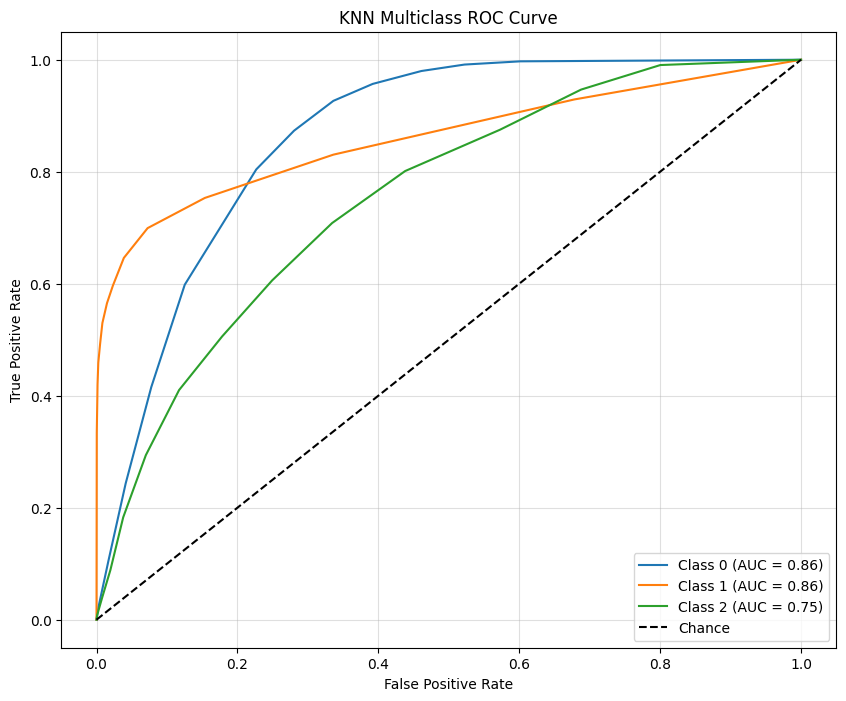

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming KNN is already trained as `knn`
# Predict probabilities
y_pred_proba = knn.predict_proba(X_test)

# Binarize the target labels for multiclass ROC
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)

# Number of classes
n_classes = y_test_binarized.shape[1]

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {auc:.2f})')

# Plot baseline
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.title('KNN Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.4)
plt.show()


**Random Forest**

**Find the optimal value for max depths**

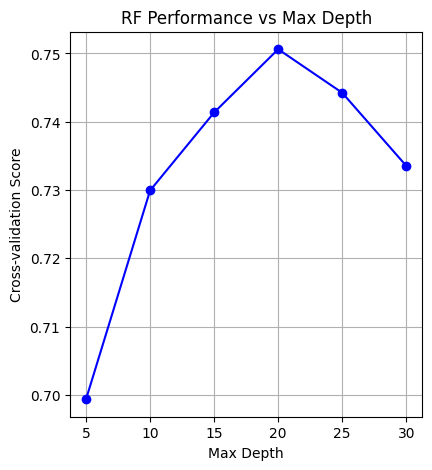

In [ ]:
# Test different depths
max_depths = [5, 10, 15, 20, 25, 30]
n_estimators = [10,50, 100, 150, 200,250]

depth_scores = []
estimator_scores = []

# Test max_depths (keeping n_estimators fixed at 100)
for depth in max_depths:
    rf = RandomForestClassifier(max_depth=depth,
                              n_estimators=100,
                              random_state=42)
    scores = cross_val_score(rf, X_train, Y_train, cv=5)
    depth_scores.append(scores.mean())

# Plot depth results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(max_depths, depth_scores, 'bo-')
plt.xlabel('Max Depth')
plt.ylabel('Cross-validation Score')
plt.title('RF Performance vs Max Depth')
plt.grid(True)


**Find the optimal value for n_estimators**

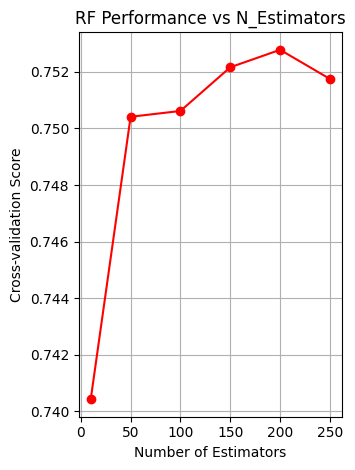

Best max_depth: 20
Best n_estimators: 200


In [ ]:
# Test n_estimators (using best depth)
best_depth = max_depths[np.argmax(depth_scores)]
for n_est in n_estimators:
    rf = RandomForestClassifier(max_depth=best_depth,
                              n_estimators=n_est,
                              random_state=42)
    scores = cross_val_score(rf, X_train, Y_train, cv=5)
    estimator_scores.append(scores.mean())

# Plot n_estimators results
plt.subplot(1, 2, 2)
plt.plot(n_estimators, estimator_scores, 'ro-')
plt.xlabel('Number of Estimators')
plt.ylabel('Cross-validation Score')
plt.title('RF Performance vs N_Estimators')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print best parameters
print(f"Best max_depth: {best_depth}")
print(f"Best n_estimators: {n_estimators[np.argmax(estimator_scores)]}")


In [ ]:
rf = RandomForestClassifier(max_depth = 15, n_estimators = 50, random_state = 42)
rf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=15, n_estimators=50, random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)

**Check RF MSE and RMSE**

In [ ]:
mse_rf = mean_squared_error(y_test,y_pred_rf)
rmse_rf = math.sqrt(mean_squared_error(y_test,y_pred_rf))
print('MSE_RF:'+str(mse_rf))
print('RMSE_RF'+str(rmse_rf))

MSE_RF:0.7314614830813535
RMSE_RF0.8552552151734321


**RF Classification Report**

In [ ]:
rf_matrix = classification_report(y_test,y_pred_rf)
print(rf_matrix)
print('MSE_RF:'+str(mse_rf))
print('RMSE_RF'+str(rmse_rf))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      1389
           1       0.95      0.76      0.84      1410
           2       0.64      0.68      0.66      1368

    accuracy                           0.74      4167
   macro avg       0.76      0.74      0.75      4167
weighted avg       0.76      0.74      0.75      4167

MSE_RF:0.7314614830813535
RMSE_RF0.8552552151734321


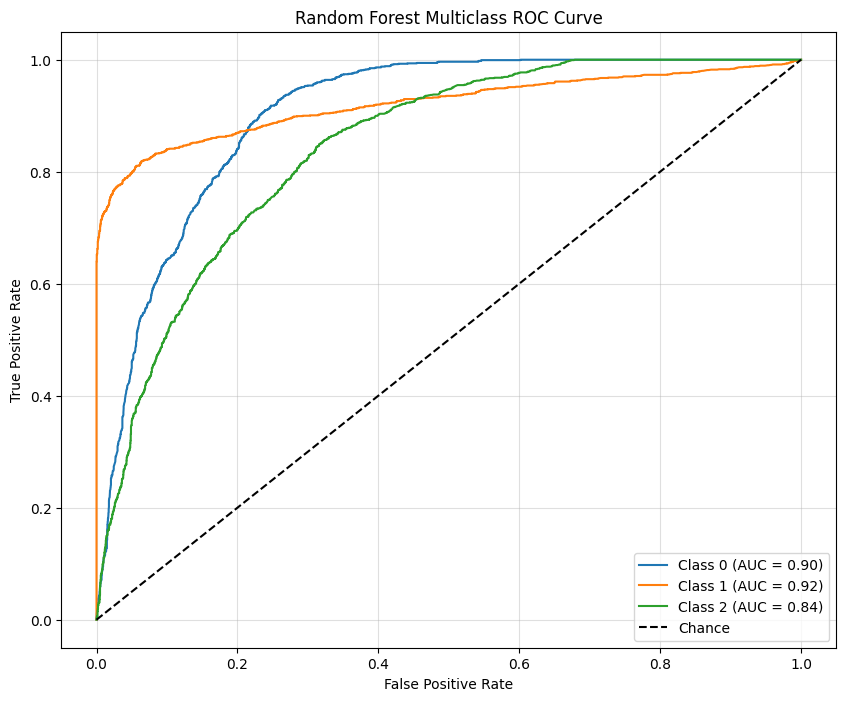

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming RandomForestClassifier is already trained as `rf`
# Predicted probabilities
y_pred_proba = rf.predict_proba(X_test)

# Binarize the target labels for multiclass ROC
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)

# Number of classes
n_classes = y_test_binarized.shape[1]

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {auc:.2f})')

# Plot baseline
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.title('Random Forest Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.4)
plt.show()


**RF Confusion Matrix**

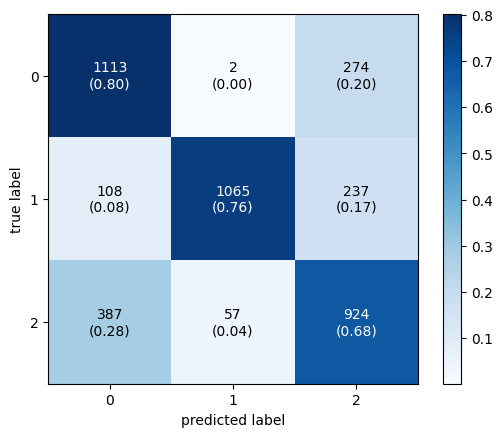

In [ ]:
cm_rf = confusion_matrix(y_test,y_pred_rf)
plot_confusion_matrix(conf_mat = cm_rf, show_absolute = True,
                     show_normed = True,
                     colorbar = True)
plt.show()

# The best model so far


**RF Secondary Test with 250 n_estimators**

In [ ]:
rf_2 = RandomForestClassifier(max_depth = 15, n_estimators = 250, random_state = 42)
rf_2.fit(X_train,Y_train)

RandomForestClassifier(max_depth=15, n_estimators=250, random_state=42)

In [ ]:
y_pred_rf_2 = rf_2.predict(X_test)

In [ ]:
mse_rf_2 = mean_squared_error(y_test,y_pred_rf_2)
rmse_rf_2 = math.sqrt(mean_squared_error(y_test,y_pred_rf_2))
print('MSE_rf_2:'+str(mse_rf_2))
print('RMSE_rf_2'+str(rmse_rf_2))
# Compare with first RF Test
print('MSE_RF:'+str(mse_rf))
print('RMSE_RF'+str(rmse_rf))

# with 250 n_estimator, it slightly perform better

MSE_rf_2:0.7269018478521718
RMSE_rf_20.8525853903581575
MSE_RF:0.7314614830813535
RMSE_RF0.8552552151734321


In [ ]:
rf_2_matrix = classification_report(y_test,y_pred_rf_2)
print(rf_2_matrix)
# Classification report compare
print(rf_matrix)

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      1389
           1       0.95      0.76      0.84      1410
           2       0.65      0.68      0.66      1368

    accuracy                           0.75      4167
   macro avg       0.76      0.75      0.75      4167
weighted avg       0.77      0.75      0.75      4167

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      1389
           1       0.95      0.76      0.84      1410
           2       0.64      0.68      0.66      1368

    accuracy                           0.74      4167
   macro avg       0.76      0.74      0.75      4167
weighted avg       0.76      0.74      0.75      4167



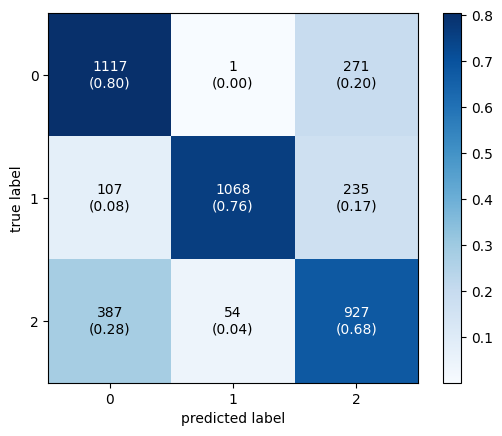

In [ ]:
cm_rf_2 = confusion_matrix(y_test,y_pred_rf_2)

plot_confusion_matrix(conf_mat = cm_rf_2, show_absolute = True,
                    show_normed = True,
                    colorbar = True)
plt.show()

# Slightly improved on predicting 1, but decrease on 0

**The Conjugate gradient approach??**

**Gradient Boosting**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [ ]:
# Predictions on the test set
y_pred = gb.predict(X_test)

# Predicted probabilities for ROC and AUC
y_pred_proba = gb.predict_proba(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.8360


In [ ]:
mse_gb = mean_squared_error(y_test, y_pred)
rmse_gb = math.sqrt(mse_gb)
print(f'MSE_GB: {mse_gb:.4f}')
print(f'RMSE_GB: {rmse_gb:.4f}')


MSE_GB: 0.5970
RMSE_GB: 0.7727


In [ ]:
from sklearn.metrics import classification_report

# Generate predictions on the test set
y_pred = gb.predict(X_test)

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report for Gradient Boosting:")
print(report)


Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     38116
           1       0.00      0.00      0.00       906
           2       0.55      0.18      0.27      6935

    accuracy                           0.84     45957
   macro avg       0.47      0.38      0.39     45957
weighted avg       0.79      0.84      0.79     45957



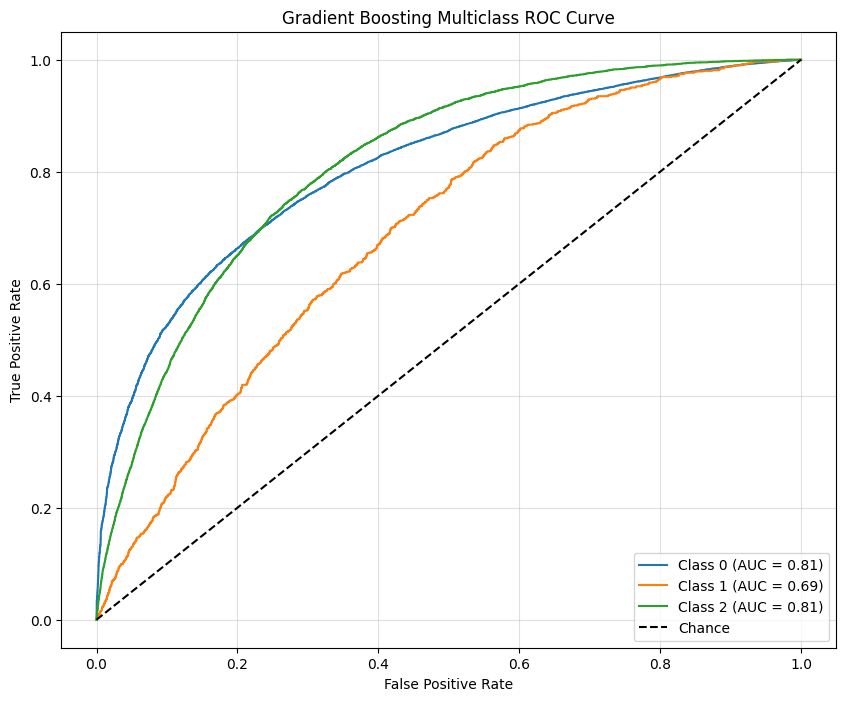

In [ ]:
# Binarize the target labels for multiclass ROC
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)

# Number of classes
n_classes = y_test_binarized.shape[1]

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {auc:.2f})')

# Plot baseline
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.title('Gradient Boosting Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.4)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv.zip')

# Split features (X) and target (y)
X = data.drop(columns=['Diabetes_012'])
y = data['Diabetes_012']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Linear Regression Using Conjugate Gradient**

In [ ]:
import numpy as np
from scipy.sparse.linalg import cg

# Compute A and b for normal equation: Aθ = b
A = X_train.T @ X_train
b = X_train.T @ y_train

# Solve using Conjugate Gradient
theta_cg, _ = cg(A, b)

# Make predictions
y_pred_cg = X_test @ theta_cg

# Evaluate (using MSE or other metrics)
from sklearn.metrics import mean_squared_error
mse_cg = mean_squared_error(y_test, y_pred_cg)
print(f"Conjugate Gradient MSE: {mse_cg}")


Conjugate Gradient MSE: 0.48570210012521614


**Linear SVM Using Conjugate Gradient**

**(Stochastic Gradient Descent - SGD)**

In [ ]:
from sklearn.linear_model import SGDClassifier

# Train an SVM model using SGD (with a linear kernel)
svm_sgd = SGDClassifier(loss="hinge", max_iter=1000, tol=1e-3)
svm_sgd.fit(X_train, y_train.replace(0, -1))  # Replace 0s with -1s for SVM compatibility

# Evaluate the model
y_pred_sgd = svm_sgd.predict(X_test)
accuracy = accuracy_score(y_test.replace(0, -1), y_pred_sgd)
print(f"SVM Accuracy (SGD): {accuracy}")


SVM Accuracy (SGD): 0.8434839167455062


In [ ]:
from sklearn.svm import SVC

# Train the SVM model with a linear kernel (efficient for large datasets)
svm_linear = SVC(kernel='linear', max_iter=1000)
svm_linear.fit(X_train, y_train.replace(0, -1))  # Replace 0 with -1 for SVM compatibility

# Make predictions
y_pred_linear_svm = svm_linear.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test.replace(0, -1), y_pred_linear_svm)
print(f"SVM Accuracy (Linear): {accuracy}")


SVM Accuracy (Linear): 0.2526411226742353


**Compare CG with Gradient Descent**

In [ ]:
import time
from sklearn.linear_model import SGDRegressor
from scipy.sparse.linalg import cg
import numpy as np

# Assuming A and b are provided, e.g., from normal equations in linear regression
# Example: Let's assume X_train is your feature matrix and y_train is your target
# A = X_train.T @ X_train (This is the normal equation part)
# b = X_train.T @ y_train (This is the normal equation part)

# Example of A and b for a toy problem (you should replace this with your real data)
A = np.random.rand(100, 100)  # Replace with X_train.T @ X_train
b = np.random.rand(100)       # Replace with X_train.T @ y_train

# Measure time for Conjugate Gradient
start_time = time.time()
theta_cg, _ = cg(A, b)  # Solve the system A * theta = b using Conjugate Gradient
cg_time = time.time() - start_time

# Measure time for Gradient Descent (example using SGDRegressor from sklearn)
sgd = SGDRegressor(max_iter=1000, tol=1e-3)
start_time = time.time()
sgd.fit(X_train, y_train)
sgd_time = time.time() - start_time

# Print the results
print(f"Conjugate Gradient Time: {cg_time:.4f} seconds")
print(f"Gradient Descent Time: {sgd_time:.4f} seconds")


Conjugate Gradient Time: 0.0690 seconds
Gradient Descent Time: 0.4445 seconds


In [ ]:
# Separate features (X) and target (y)
X = data.drop('Diabetes_012', axis=1)  # Assuming 'Diabetes_012' is your target variable
y = data['Diabetes_012']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Fit and transform on training data
X_test = scaler.transform(X_test) # Transform test data using the fitted scaler



# Create an SVM classifier object
svm_classifier = SVC(kernel='linear', C=1.0)  # You can experiment with different kernels and C values

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8434839167455062
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.92     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.00      0.00      0.00      6997

    accuracy                           0.84     50736
   macro avg       0.28      0.33      0.31     50736
weighted avg       0.71      0.84      0.77     50736

[[42795     0     0]
 [  944     0     0]
 [ 6997     0     0]]
